## Bank Churn Data

Field	         Description
CustomerId	     A unique identifier for each customer
Surname	         The customer's last name
CreditScore	     A numerical value representing the customer's credit score
Geography	     The country where the customer resides (France, Spain or Germany)
Gender	         The customer's gender (Male or Female)
Age	             The customer's age
Tenure	         The number of years the customer has been with the bank
Balance	         The customer's account balance
NumOfProducts	 The number of bank products the customer uses (e.g., savings account, credit card)
HasCrCard	     Whether the customer has a credit card (1 = yes, 0 = no)
IsActiveMember	 Whether the customer is an active member (1 = yes, 0 = no)
EstimatedSalary	 The estimated salary of the customer
Exited	         Whether the customer has churned (1 = yes, 0 = no)


In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset.
bank_df = pd.read_csv(r'C:\Users\MichaelWong\OneDrive\AUT Data science and AI\Mini project one\Bank_Churn.csv')
bank_df.head(10).sample(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [2]:
# Check data types of the entire dataset.
bank_df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [3]:
# Check the number of rows and columns of the dataset.
bank_df.shape

(10000, 13)

In [4]:
# Check if any duplicate values in the entire dataset.
bank_df.duplicated().any()

False

In [5]:
# Find null values.
bank_df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Profile of the dataset.
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
# Total counts of target variable 'Exited'.
bank_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
# Set the CustomerId as the index.
bank_df.set_index('CustomerId', inplace = True, verify_integrity = True)
bank_df.head(10).sample(10)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Statisical summary of the numeric values in the dataset.
bank_df.describe().map('{:,.2f}'.format)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


In [10]:
# Determine if there is a relationship within the dataset using correlation.
corr = bank_df.corr(numeric_only = True)
corr.map('{:.4f}'.format)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0000,-0.0040,0.0008,0.0063,0.0122,-0.0055,0.0257,-0.0014,-0.0271
Age,-0.0040,1.0000,-0.0100,0.0283,-0.0307,-0.0117,0.0855,-0.0072,0.2853
Tenure,0.0008,-0.0100,1.0000,-0.0123,0.0134,0.0226,-0.0284,0.0078,-0.0140
Balance,0.0063,0.0283,-0.0123,1.0000,-0.3042,-0.0149,-0.0101,0.0128,0.1185
NumOfProducts,0.0122,-0.0307,0.0134,-0.3042,1.0000,0.0032,0.0096,0.0142,-0.0478
HasCrCard,-0.0055,-0.0117,0.0226,-0.0149,0.0032,1.0000,-0.0119,-0.0099,-0.0071
IsActiveMember,0.0257,0.0855,-0.0284,-0.0101,0.0096,-0.0119,1.0000,-0.0114,-0.1561
EstimatedSalary,-0.0014,-0.0072,0.0078,0.0128,0.0142,-0.0099,-0.0114,1.0000,0.0121
Exited,-0.0271,0.2853,-0.0140,0.1185,-0.0478,-0.0071,-0.1561,0.0121,1.0000


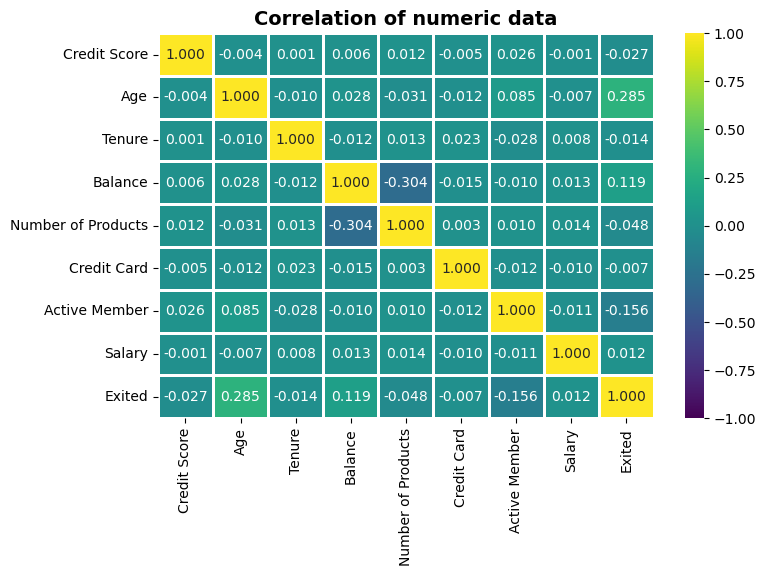

In [11]:
# Visualise the corr variable with a heat map.
labels = ['Credit Score', 'Age', 'Tenure','Balance', 'Number of Products',
          'Credit Card', 'Active Member', 'Salary', 'Exited']

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot = True, fmt = '.3f', vmin = -1, vmax = 1,
           linewidth = 1, cmap = 'viridis', xticklabels = labels, yticklabels = labels)
plt.title('Correlation of numeric data', fontsize = 14, fontweight = 'bold')
plt.savefig('heat_map1.jpg', bbox_inches = 'tight')
plt.show()

<Figure size 1000x800 with 0 Axes>

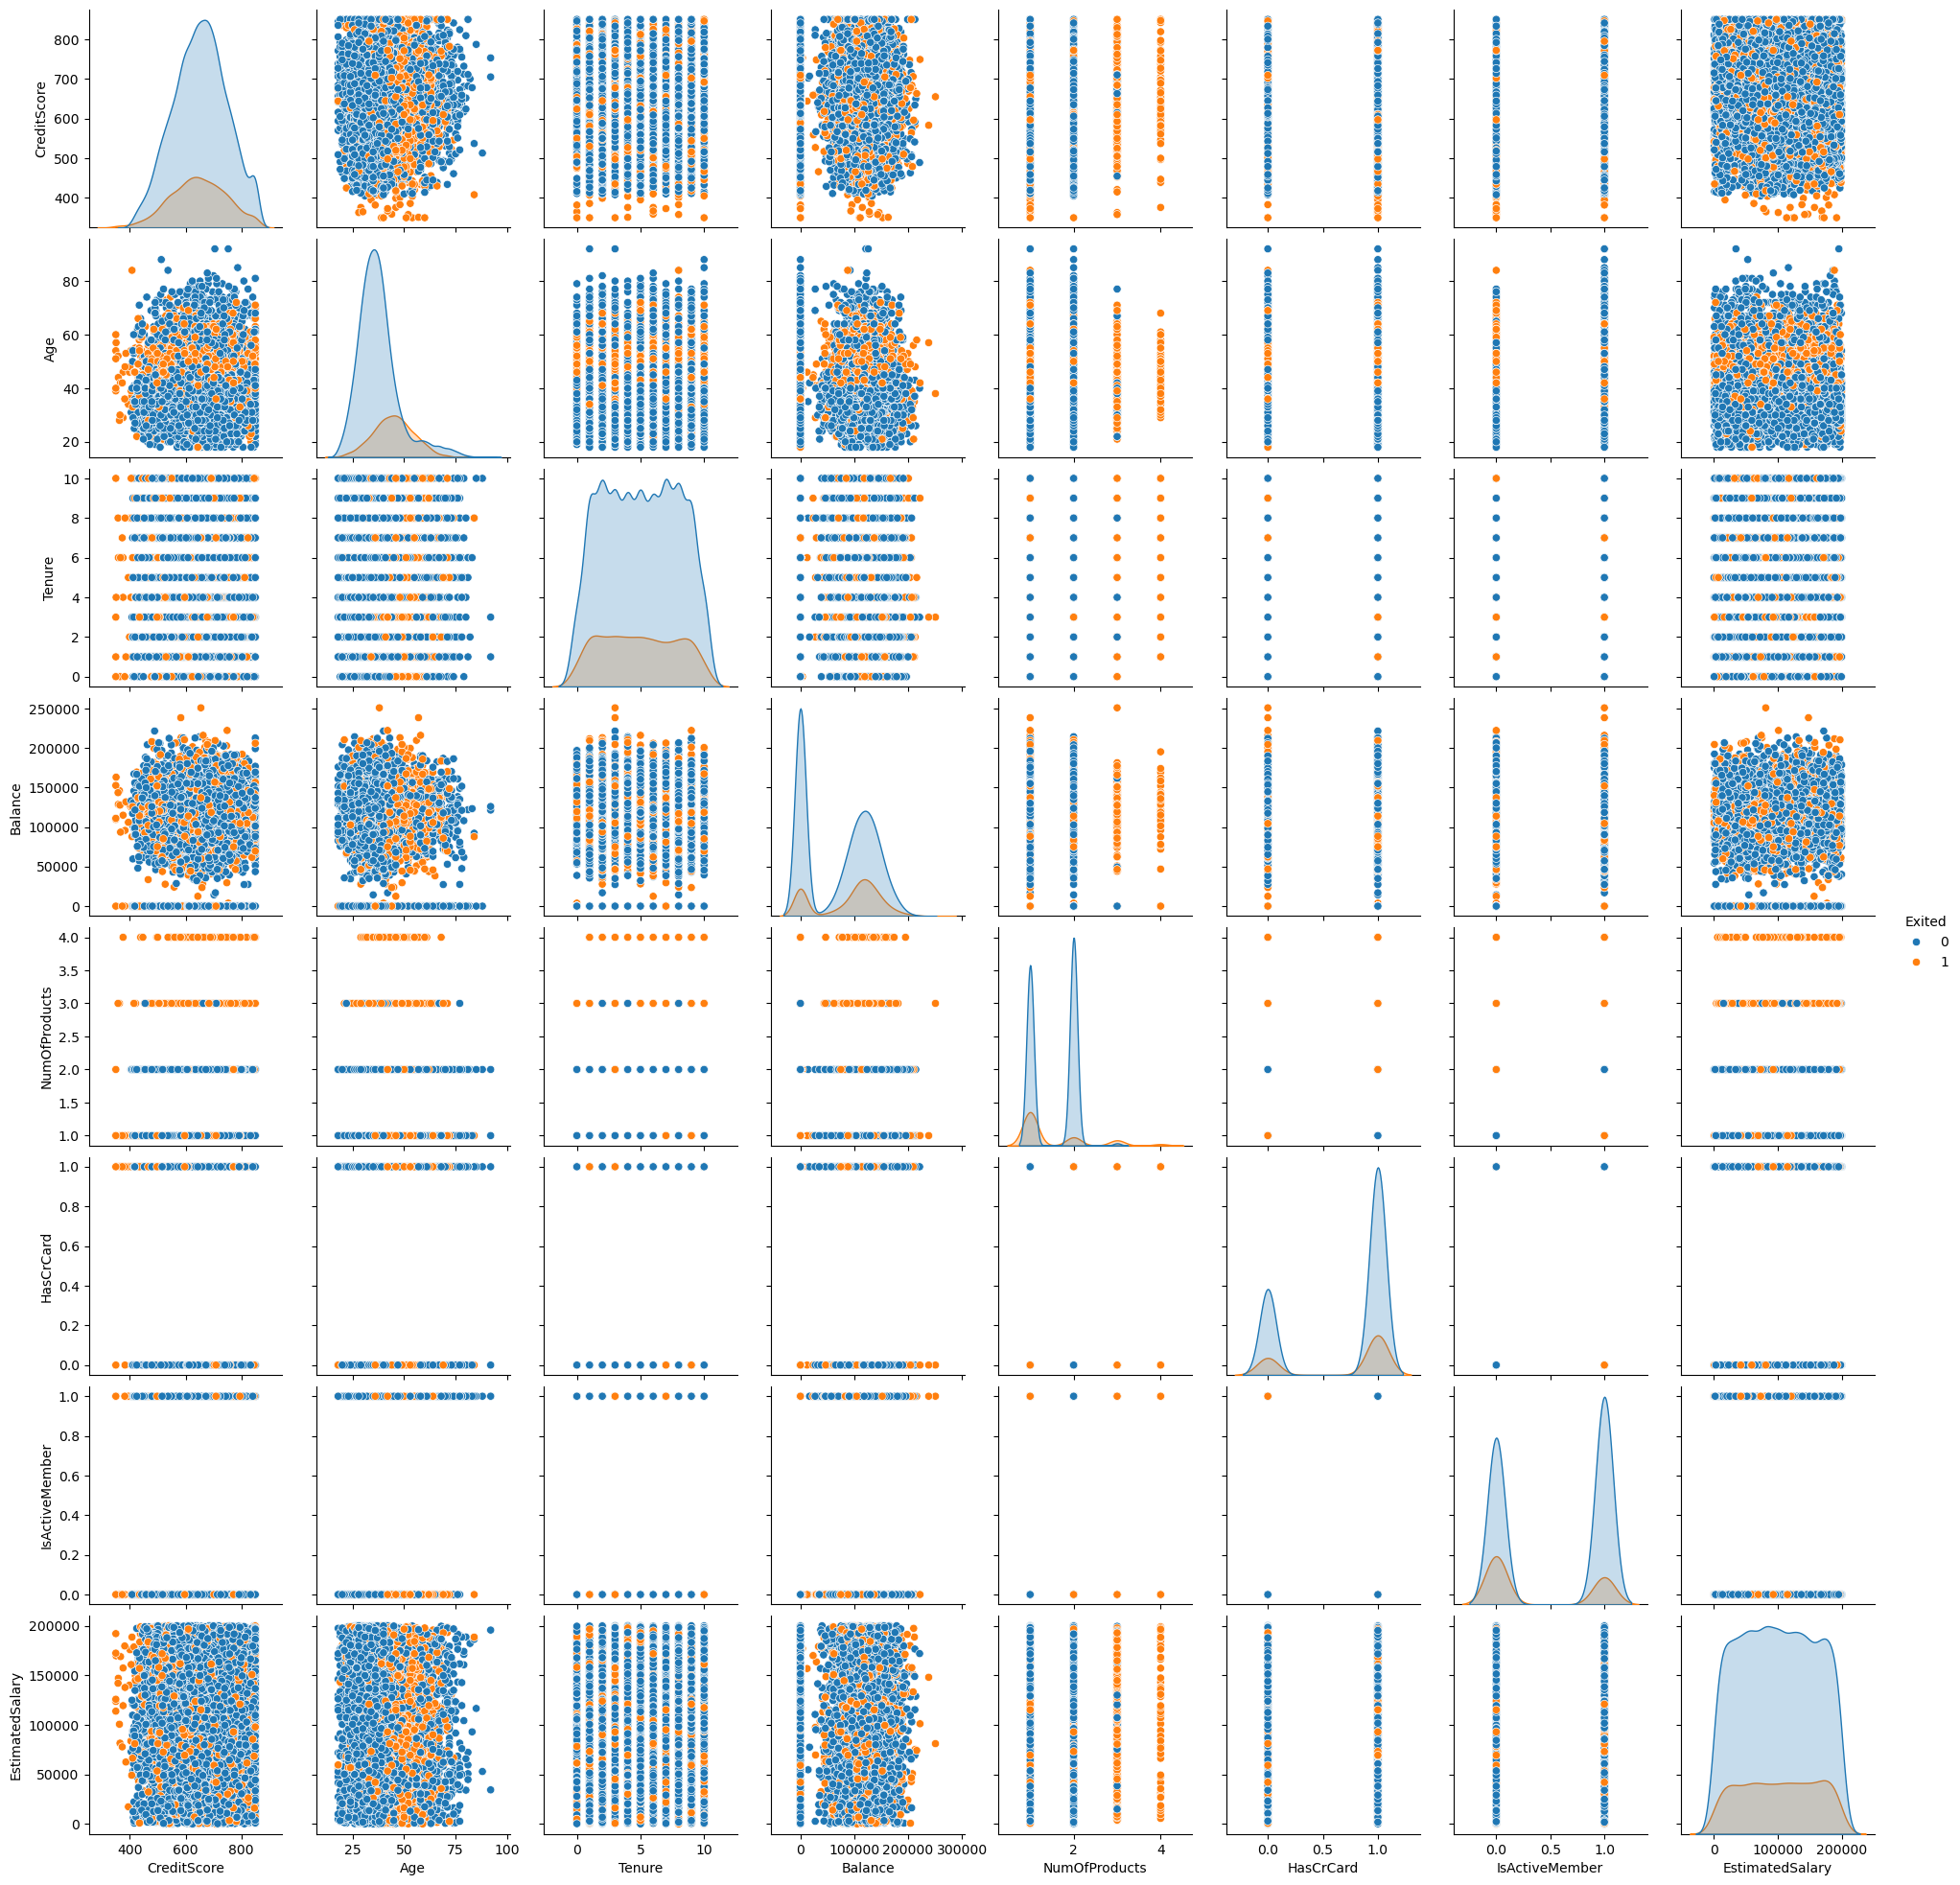

In [12]:
# Create pair plot of numeric values.
plt.figure(figsize = (10,8))
pair_plot = sns.pairplot(bank_df, hue = 'Exited', palette = 'tab10')
plt.show()
pair_plot.savefig('pairplot.jpg', bbox_inches = 'tight')

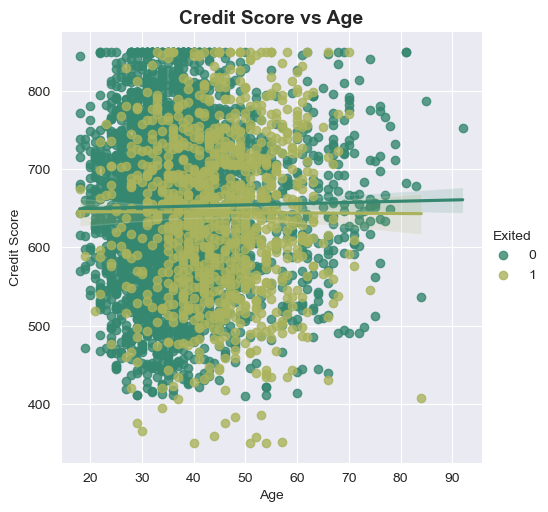

In [13]:
# Plot age and credit score.
sns.set_style('darkgrid')
sns.lmplot(x = 'Age', y = 'CreditScore', data = bank_df.sample(5000),
           palette = 'gist_earth', hue = 'Exited', fit_reg = True)
plt.title('Credit Score vs Age', fontweight = 'bold', fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.savefig('lmplot1.jpg', bbox_inches = 'tight')
plt.show()

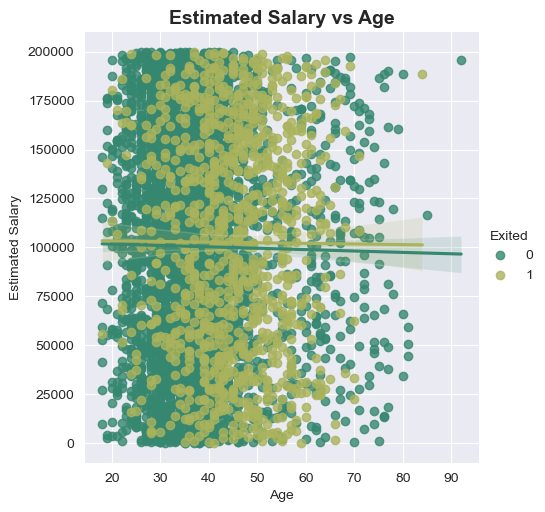

In [14]:
# Plot age and estimated salary.
sns.set_style('darkgrid')
sns.lmplot(x = 'Age', y = 'EstimatedSalary', data = bank_df.sample(5000),
           palette = 'gist_earth', hue = 'Exited', fit_reg = True)
plt.title('Estimated Salary vs Age', fontweight = 'bold', fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.savefig('lmplot2.jpg', bbox_inches = 'tight')
plt.show()

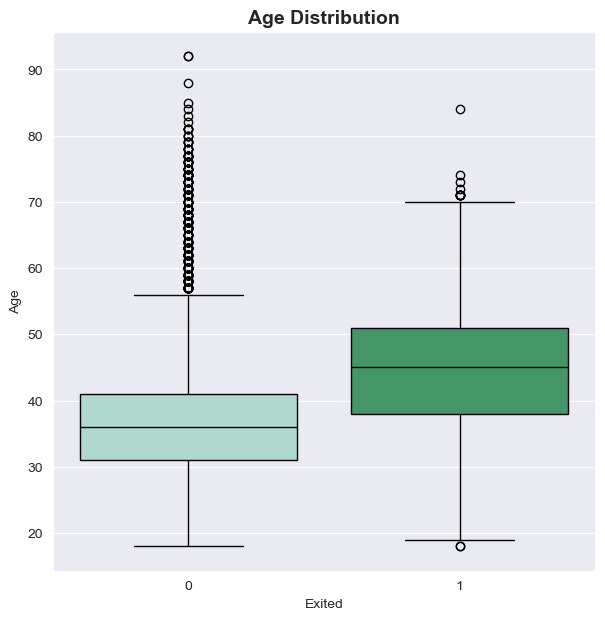

In [15]:
# Create a box plot of Age with target variable 
plt.figure(figsize = (7,7))
sns.boxplot(bank_df, y = 'Age' , x = 'Exited', palette = 'BuGn', 
            linecolor = 'black')
plt.title('Age Distribution', fontweight = 'bold', fontsize = 14)
plt.savefig('Age.jpg', bbox_inches = 'tight')
plt.show()

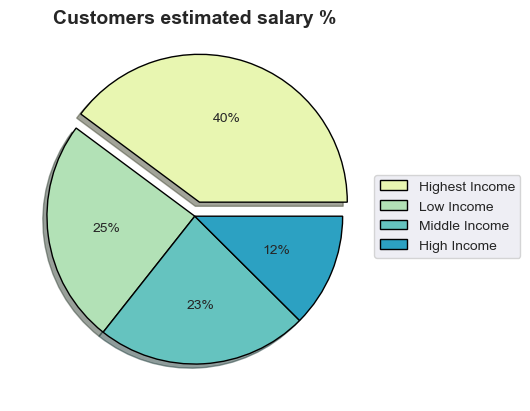

In [16]:
# Create new column based on Estimated Salary. Create four new categories.
def sal_var(row):
    if row['EstimatedSalary'] <= 50000:
        val = 'Low Income'
    elif row['EstimatedSalary'] >= 50001 and row['EstimatedSalary'] <= 95000:
        val = 'Middle Income'
    elif row['EstimatedSalary'] >= 95001 and row['EstimatedSalary']  <= 120000:
        val = 'High Income'
    else: 
        val = 'Highest Income'
    return val

bank_df['Salary_var'] = bank_df.apply(sal_var, axis = 1)
salary_count = bank_df['Salary_var'].value_counts()

fig = plt.figure()
plt.pie(salary_count, autopct = '%1.0f%%', explode = [0.1, 0, 0, 0],
       shadow = True, colors = sns.color_palette(palette = 'YlGnBu'), wedgeprops = {'ec':'black'})
plt.legend(salary_count.index, loc = 'center right', bbox_to_anchor = (1.4,0.5))
plt.title('Customers estimated salary %', fontweight = 'bold', fontsize = 14)
plt.savefig('pie1.jpg', bbox_inches = 'tight')
plt.show()

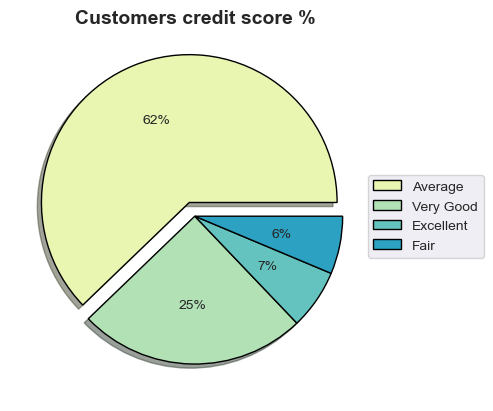

In [17]:
# Create new column based on Credit Score. Create four new categories.
def score_var(row):
    if row['CreditScore'] <= 299:
        val = 'Low'
    elif row['CreditScore'] >= 300 and row['CreditScore'] <= 499:
        val = 'Fair'
    elif row['CreditScore'] >= 500 and row['CreditScore'] <= 699:
        val = 'Average'
    elif row['CreditScore'] >= 700 and row['CreditScore'] <= 799:
        val = 'Very Good'
    else: 
        val = 'Excellent'
    return val

bank_df['Score_var'] = bank_df.apply(score_var, axis = 1)
score_count = bank_df['Score_var'].value_counts()

plt.pie(score_count, autopct = '%1.0f%%', explode = [0.1, 0, 0, 0],
       shadow = True, colors = sns.color_palette(palette = 'YlGnBu'), wedgeprops = {'ec':'black'})
plt.legend(score_count.index, loc = 'center right', bbox_to_anchor = (1.3,0.5))
plt.title('Customers credit score %', fontweight = 'bold', fontsize = 14)
plt.savefig('pie2.jpg', bbox_inches = 'tight')
plt.show()

In [18]:
# Revisit the categorical values
exited_group = bank_df.groupby('Gender')[['Geography', 'Exited']].value_counts().unstack()
exited_group

Exited               0    1
Gender Geography           
Female France     1801  460
       Germany     745  448
       Spain       858  231
Male   France     2403  350
       Germany     950  366
       Spain      1206  182

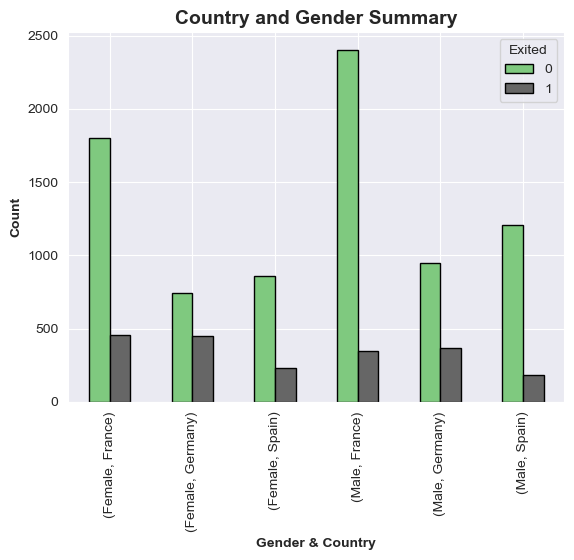

In [19]:
# Plot the count of categtorical values.
exited_group.plot.bar(edgecolor = 'black', cmap = 'Accent')
plt.title('Country and Gender Summary', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')
plt.xlabel('Gender & Country', fontweight = 'bold')
plt.savefig('summary.jpg', bbox_inches = 'tight')
plt.show()

In [20]:
# Create dummy values from the categorical columns. Analyse for possible relationship.
# Copy original dataset.
import copy
bank_df1 = copy.deepcopy(bank_df)
bank_df1.head().sample(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Salary_var,Score_var
CustomerId,,,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,High Income,Average
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Middle Income,Average
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle Income,Excellent
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,High Income,Average
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,High Income,Average


In [21]:
# Filter by categorical value columns and target variable.
bank_df1 = bank_df1[['Geography','Gender','Exited']]
bank_df1.head().sample(5)

,Geography,Gender,Exited
CustomerId,,,
15737888,Spain,Female,0
15701354,France,Female,0
15647311,Spain,Female,0
15634602,France,Female,1
15619304,France,Female,1


In [22]:
# Create new dummy column for Gender.
bank_df1['Gender_Var'] = np.where(bank_df['Gender'] == 'Female', 0, 1)
bank_df1.head()

,Geography,Gender,Exited,Gender_Var
CustomerId,,,,
15634602,France,Female,1,0
15647311,Spain,Female,0,0
15619304,France,Female,1,0
15701354,France,Female,0,0
15737888,Spain,Female,0,0


In [23]:
# Create new dummy column for Geography.
def geo_var(row):
    if row['Geography'] == 'France':
        val = 0
    elif row['Geography'] == 'Germany':
        val = 1
    else:
        val = 2
    return val

bank_df1['Geography_Var'] = bank_df1.apply(geo_var, axis = 1)
bank_df1.head(5).sample(5)

,Geography,Gender,Exited,Gender_Var,Geography_Var
CustomerId,,,,,
15701354,France,Female,0,0,0
15737888,Spain,Female,0,0,2
15619304,France,Female,1,0,0
15634602,France,Female,1,0,0
15647311,Spain,Female,0,0,2


In [24]:
# Aggregate new columns.
exited_group1 = bank_df1.groupby(['Gender_Var'])[['Geography_Var', 'Exited']].value_counts().unstack()
exited_group1

Exited                       0    1
Gender_Var Geography_Var           
0          0              1801  460
           1               745  448
           2               858  231
1          0              2403  350
           1               950  366
           2              1206  182

In [25]:
# Check both aggregated variables return the same values.
print(exited_group)
print(exited_group1)

Exited               0    1
Gender Geography           
Female France     1801  460
       Germany     745  448
       Spain       858  231
Male   France     2403  350
       Germany     950  366
       Spain      1206  182
Exited                       0    1
Gender_Var Geography_Var           
0          0              1801  460
           1               745  448
           2               858  231
1          0              2403  350
           1               950  366
           2              1206  182


In [26]:
# Correlate the categorical values with the target variable.
corr_1 = bank_df1.corr(numeric_only = True)
corr_1.round(4)

,Exited,Gender_Var,Geography_Var
Exited,1.0000,-0.1065,0.0359
Gender_Var,-0.1065,1.0000,0.0047
Geography_Var,0.0359,0.0047,1.0000


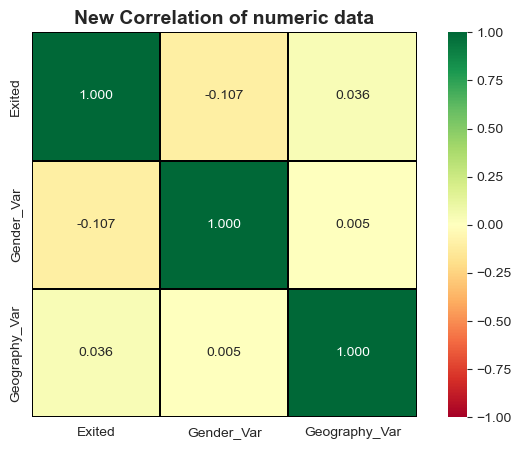

In [27]:
# Visualise the corr_1 function with a heat map
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr_1, annot = True, fmt = '.3f', vmin = -1, vmax = 1, cmap = 'RdYlGn',
            linecolor = 'black', linewidth = 0.1, square = True)
plt.title('New Correlation of numeric data', fontsize = 14, fontweight = 'bold')
plt.savefig('summary1.jpg', bbox_inches = 'tight')
plt.show()